In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"


In [2]:
raw_df = pd.read_csv("Zomato Chennai Listing 2020.csv")

In [3]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


Getting basic info about the dataset

In [4]:
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


Cleaning the dataset

In [7]:
#Dropping the column not necessary for analysis
raw_df.drop(["Zomato URL","Address"],axis = 1, inplace = True)

In [8]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


#Removing null records

In [9]:
#Removing null records
raw_df.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [10]:
raw_df[raw_df['Dining Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,NaN,Does not offer Dining,4.3,1061,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,NaN,Does not offer Dining,3.9,19600,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,NaN,Does not offer Dining,4.0,11200,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,NaN,Does not offer Dining,4.2,11500,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,NaN,Does not offer Dining,3.9,652,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [11]:
replacement_value = 0.0
raw_df['Dining Rating'] = raw_df['Dining Rating'].fillna(replacement_value)

In [12]:
 raw_df[raw_df['Dining Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [13]:
 raw_df[raw_df['Delivery Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094,NaN,Does not offer Delivery,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000.0,4.1,354,NaN,Does not offer Delivery,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500.0,4.2,464,NaN,Does not offer Delivery,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
85,Bazaar - All Day Diner - Grand by GRT Hotels,Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...","['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...",2500.0,4.4,1198,NaN,Not enough Delivery Reviews,"['Breakfast', 'Home Delivery', 'Serves Alcohol..."
89,Coal Barbecues,Velachery,"['North Indian', ' Chinese']","['Chicken Honey', ' Fish', ' Prawn', ' Waffles...",1400.0,4.4,9410,NaN,Does not offer Delivery,"['Indoor Seating', 'Buffet', 'Table reservatio..."
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0.0,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0.0,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0.0,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [14]:
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].fillna(replacement_value)

In [15]:
 raw_df[raw_df['Delivery Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    11812 non-null  object 
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  11812 non-null  object 
 9   Features               12032 non-null  object 
dtypes: float64(3), object(7)
memory usage: 940.1+ KB


In [17]:
raw_df.isnull().sum()

Name of Restaurant         0
Location                   0
Cuisine                    0
Top Dishes                 0
Price for 2                0
Dining Rating              0
Dining Rating Count      220
Delivery Rating            0
Delivery Rating Count    220
Features                   0
dtype: int64

In [18]:
#replacing other records with NA
raw_df.fillna('NA',inplace = True)

In [19]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

Converting numeriocal column to numeric datatype

In [20]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
1620                            1
2405                            1
587                             1
405                             1
1083                            1
Name: count, Length: 794, dtype: int64

In [21]:
raw_df['Dining Rating Count'].replace(to_replace = ['Does not offer Dining','RATING','Not enough Dining Reviews','NA'],value = 0,inplace = True)

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\2182542853.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [22]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
0       5351
4        339
5        271
6        248
8        180
        ... 
1302       1
5073       1
1739       1
814        1
5317       1
Name: count, Length: 792, dtype: int64

In [23]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NA                              220
27                               34
32                               30
                               ... 
1765                              1
3391                              1
1192                              1
480                               1
4415                              1
Name: count, Length: 2282, dtype: int64

In [24]:
raw_df['Delivery Rating Count'].replace(to_replace = ['Not enough Delivery Reviews','Does not offer Delivery','NA'],value = 0,inplace = True)

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\3118493551.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
0       5851
27        34
32        30
22        30
37        30
        ... 
1139       1
817        1
1750       1
2905       1
2183       1
Name: count, Length: 2280, dtype: int64

In [26]:
#change to numeric datatyp
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype(int)
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype(int)

In [27]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


In [28]:
raw_df[raw_df['Top Dishes'].str.contains('Invalid')]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
72,Deen Biriyani,Aminijikarai,"['Biryani', ' South Indian', ' North Indian', ...",Invalid,500.0,3.9,460,3.8,18,"['Home Delivery', 'Indoor Seating']"
240,Smoke Hub Barbeque,Velachery,"['BBQ', ' Asian', ' North Indian', ' Desserts'...",Invalid,1500.0,4.3,867,0.0,0,"['Home Delivery', 'Serves Halal', 'Gaming Area..."
291,Nellai Fast Food,Thousand Lights,"['Chinese', ' Biryani', ' North Indian']",Invalid,300.0,4.0,366,3.8,24200,"['Breakfast', 'Home Delivery', 'Indoor Seating']"
294,Hunger Palato,Medavakkam,"['Momos', ' Steak', ' Burger']",Invalid,350.0,3.9,128,3.9,44,"['Breakfast', 'Home Delivery', 'Outdoor Seatin..."
436,Kebab@Lake Street,Velachery,"['Kebab', ' Mughlai', ' Chinese', ' Biryani']",Invalid,500.0,4.0,266,3.8,10300,"['Home Delivery', 'Catering Available', 'Free ..."
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [29]:
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace('Invalid','',regex=True)

In [30]:
raw_df[raw_df['Top Dishes'].str.contains('Invalid')]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [31]:
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace('\\[','',regex=True)
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace('\\]','',regex=True)
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace('\\[','',regex=True)
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace('\\]','',regex=True)
raw_df['Features'] = raw_df['Features'].str.replace('\\[','',regex=True)
raw_df['Features'] = raw_df['Features'].str.replace('\\]','',regex=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500,4.3,9306,"'Home Delivery', 'Indoor Seating'"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101,4.0,11200,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"


In [32]:
#removing restaurant records whose voting is 0
useless_data = (raw_df['Dining Rating']== 0.0) & (raw_df['Delivery Rating'] == 0.0)
raw_df[useless_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
1603,Erode Amman Mess,Thiruvanmiyur,"'Chettinad', ' South Indian', ' Kerala', ' Chi...",,600.0,0.0,0,0.0,0,"'Home Delivery', 'Indoor Seating', 'Table book..."
2159,The Ultimate Brownie And Chocolate Place,Sholinganallur,"'Bakery', ' Desserts'",,350.0,0.0,0,0.0,0,"'Delivery Only', 'Desserts and Bakes'"
2419,Amudha Aunty's kitchen,Sholinganallur,"'Tamil', ' South Indian'",,250.0,0.0,0,0.0,0,"'Breakfast', 'Delivery Only'"
2537,TN 03 CAFE,Tiruvottiyur,"'Sandwich', ' Fast Food', ' Ice Cream', ' Beve...",,200.0,0.0,0,0.0,0,'Delivery Only'
2542,Maggi Point,Tambaram,"'Fast Food', ' Street Food', ' Beverages'",'Masala Maggi',500.0,0.0,0,0.0,0,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,'Sandwich',,350.0,0.0,0,0.0,0,"'Breakfast', 'Delivery Only'"
12028,CK's Sandwiches,Kolathur,'Sandwich',,350.0,0.0,0,0.0,0,"'Breakfast', 'Delivery Only'"
12029,CK's Sandwiches,Anna Nagar East,'Sandwich',,350.0,0.0,0,0.0,0,"'Breakfast', 'Delivery Only'"
12030,CK's Sandwiches,Ramapuram,'Sandwich',,350.0,0.0,0,0.0,0,"'Breakfast', 'Delivery Only'"


In [33]:
raw_df = raw_df[~useless_data]
raw_df[useless_data]

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\273359261.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [34]:
raw_df.shape

(8481, 10)

In [35]:
raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [36]:
#copy cleaned data into new dataset
zomato_chennai_df = raw_df.copy()

In [37]:
zomato_chennai_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500,4.3,9306,"'Home Delivery', 'Indoor Seating'"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101,4.0,11200,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...
11901,Dhabba On Wheels,Okkiyampet,'North Indian',,500.0,0.0,0,3.0,54,"'Home Delivery', 'Indoor Seating'"
11914,Sandwich Sisters,Velachery,'Sandwich',,200.0,0.0,0,3.6,75,"'Home Delivery', 'Free Parking'"
11953,The Sandwich Box,Navallur,"'Sandwich', ' Fast Food', ' Beverages'",,300.0,0.0,0,3.9,21,"'Home Delivery', 'Indoor Seating'"
11959,The Shangai Story,Madipakkam,'Chinese',,350.0,0.0,0,2.9,17,'Delivery Only'


In [38]:
#No of. restaurants in chennai
zomato_chennai_df["Name of Restaurant"].value_counts()

Name of Restaurant
Domino's Pizza               66
CK's Bakery                  59
Lassi Shop                   55
Cafe Coffee Day              45
A2B - Adyar Ananda Bhavan    44
                             ..
Eden                          1
The Bark                      1
Sandwich Sisters              1
The Sandwich Box              1
Kebab Center                  1
Name: count, Length: 5768, dtype: int64

In [39]:
#Get the no of restaurants having rating more than 4.5
highrate_rest_df = zomato_chennai_df[(zomato_chennai_df['Dining Rating']>4.5) | (zomato_chennai_df['Delivery Rating'] > 4.5)]
highrate_rest_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
24,Eating Circles,Alwarpet,'South Indian',"'Rose Milk', ' Neer Dosa', ' Thatte Idli', ' O...",250.0,4.7,782,4.2,2744,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
37,Shree Mithai,Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panipu...",300.0,4.6,1085,4.4,18600,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
50,Andhikkadai,Velachery,'South Indian',"'Coffee', ' Sweet Kozhukattai', ' Idli', ' Pon...",200.0,4.6,908,4.2,17300,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
57,Brownie Heaven,Royapettah,"'Bakery', ' Desserts', ' Beverages'","'Vanilla Ice Cream', ' Brownie Shake', ' Filte...",350.0,4.9,842,4.3,2270,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
59,Mezze,Alwarpet,'Middle Eastern',"'Baklava', ' Mezze', ' Shawarma', ' Pita Bread...",700.0,4.7,1152,4.2,2249,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...
10334,CK's Bakery,Choolaimedu,"'Bakery', ' Desserts', ' Fast Food', ' Sandwich'",,350.0,3.1,23,4.6,99,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
10358,CK's Bakery,Ekkaduthangal,"'Bakery', ' Desserts', ' Fast Food', ' Sandwich'",,350.0,3.2,9,4.6,86,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
10525,Cake Waves,Arumbakkam,"'Bakery', ' Fast Food'",,500.0,3.1,17,4.6,67,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
11379,NIC - Natural Ice Creams,Porur,'Ice Cream',,150.0,0.0,0,4.6,102,"'Delivery Only', 'Desserts and Bakes'"


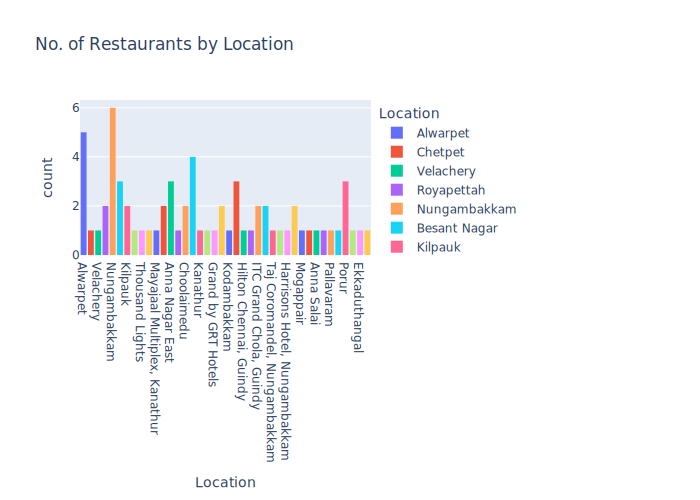

In [40]:
#No of restaurants in Chennai by location wise whose dining or delivery rating is more than 
fig = px.histogram(highrate_rest_df, x='Location', color='Location',title= 'No. of Restaurants by Location',labels={'Location':'Location'})
fig.show()


In [41]:
#No of vegeterian restaurants location wise with rating >
veg_df = highrate_rest_df[zomato_chennai_df['Features'].str.contains('Vegetarian Only') ]
veg_df

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\2442777272.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
24,Eating Circles,Alwarpet,'South Indian',"'Rose Milk', ' Neer Dosa', ' Thatte Idli', ' O...",250.0,4.7,782,4.2,2744,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
37,Shree Mithai,Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panipu...",300.0,4.6,1085,4.4,18600,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
50,Andhikkadai,Velachery,'South Indian',"'Coffee', ' Sweet Kozhukattai', ' Idli', ' Pon...",200.0,4.6,908,4.2,17300,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
70,Little Italy,Besant Nagar,"'Italian', ' Mexican', ' Salad'","'Pasta', ' Pizza', ' Nachos', ' Tiramisu', ' M...",1500.0,4.7,1349,4.2,1435,"'Home Delivery', 'Vegetarian Only', 'Valet Par..."
75,Fusilli Reasons,Kilpauk,'Fast Food',"'Nachos', ' Iced Tea', ' Garlic Bread', ' Brow...",400.0,4.7,3042,4.4,3954,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
92,Fruit Shop On Greams Road,Thousand Lights,"'Beverages', ' Fast Food', ' Healthy Food', ' ...","'Fruit Juices', ' Sandwich', ' Mint Lime Coole...",350.0,4.5,609,4.6,1699,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
108,Rayar's Mess,Mylapore,'South Indian',"'Pongal', ' Vada', ' Filtered Coffee', ' Idli'...",100.0,4.7,904,4.3,1319,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
155,The Sandwich Shop,West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' Ta...",300.0,4.9,584,4.4,895,"'Home Delivery', 'Vegetarian Only', 'Bulk Orde..."
156,SpiceKlub,Nungambakkam,"'North Indian', ' Desserts', ' Beverages'","'Kulfi', ' Vada Pav', ' Panipuri', ' Pav Bhaji...",1700.0,4.6,1132,3.9,237,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
219,Prems Graama Bhojanam,Adyar,'South Indian',"'Benne Dosa', ' Buttermilk', ' Thatte Idli', '...",500.0,4.9,1511,4.1,4621,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."


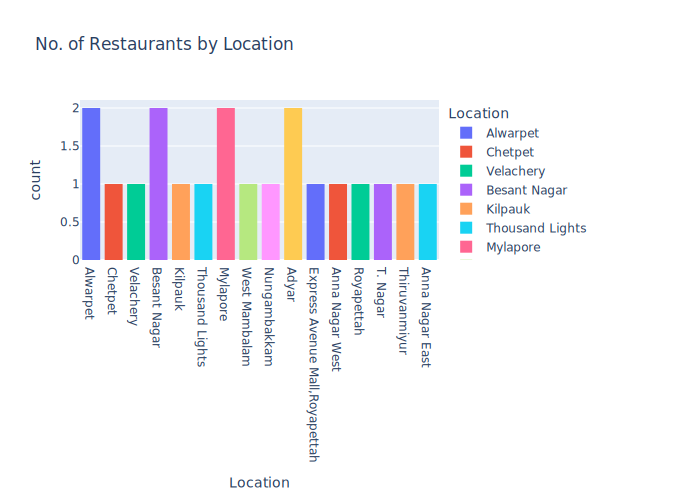

In [42]:
fig = px.histogram(veg_df, x='Location', color='Location',title= 'No. of Restaurants by Location',
                   labels={'Location':'Location'})
fig.show()

In [43]:
# !pip install kaleido

In [44]:
#percentage of restaurants by delivery rating >4.5
high_del_rate_df = zomato_chennai_df[zomato_chennai_df['Delivery Rating'] >=4.5]
rating_type_df = high_del_rate_df['Delivery Rating'].value_counts().reset_index()
rating_type_df.rename(columns = {'index':'Name of Restaurant','Delivery Rating':'Rating','count':'COUNT OF RESTAURANTS'},inplace = True)
rating_type_df

,Rating,COUNT OF RESTAURANTS
0,4.5,55
1,4.6,24
2,4.7,4


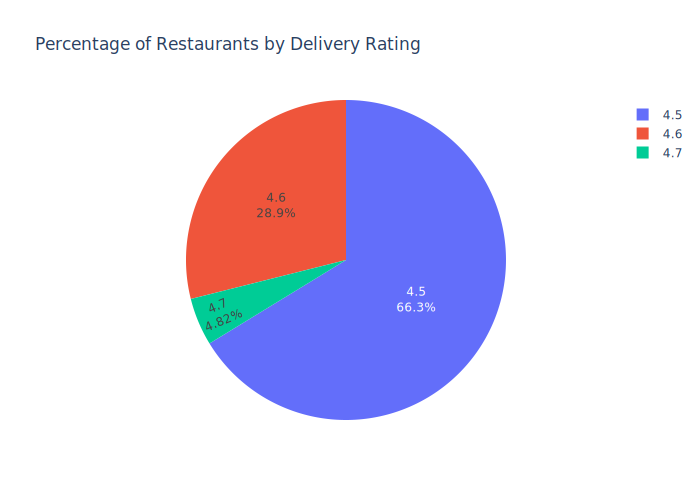

In [45]:
fig = px.pie(rating_type_df, names='Rating', values='COUNT OF RESTAURANTS', color='Rating',title='Percentage of Restaurants by Delivery Rating').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [46]:
#percentage of restaurants by delivery rating >4.5
high_din_rate_df = zomato_chennai_df[zomato_chennai_df['Dining Rating'] >=4.5]
rating_type_df = high_din_rate_df['Dining Rating'].value_counts().reset_index()
rating_type_df.rename(columns = {'index':'Name of Restaurant','Dining Rating':'Rating','count':'COUNT OF RESTAURANTS'},inplace = True)
rating_type_df

,Rating,COUNT OF RESTAURANTS
0,4.5,36
1,4.6,17
2,4.7,12
3,4.9,7
4,4.8,4


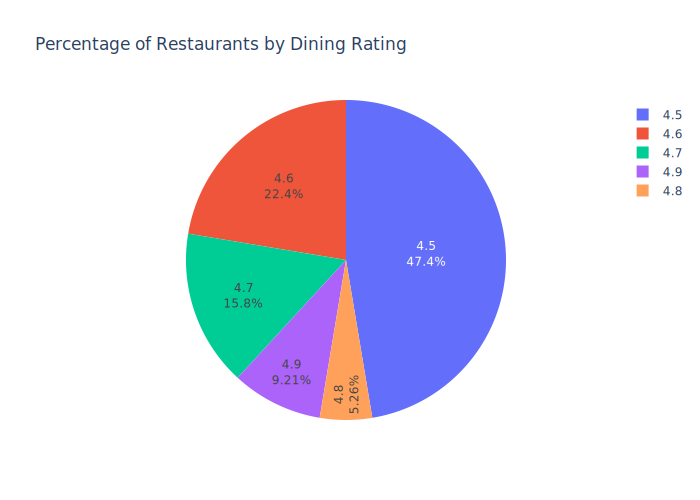

In [47]:
fig = px.pie(rating_type_df, names='Rating', values='COUNT OF RESTAURANTS', color='Rating',title='Percentage of Restaurants by Dining Rating').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [48]:
#top 10 Biryani restuarants sory by dining rating 
briyanidine_df = zomato_chennai_df[zomato_chennai_df['Cuisine'].str.contains('Biryani')]
briyanidine_df.sort_values(by = 'Dining Rating',ascending = False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
199,Arabian Kebab Center,Kodambakkam,"'Biryani', ' North Indian', ' Kebab'","'Shawarma', ' Chicken Grill', ' Brinjal Gravy'...",400.0,4.6,798,0.0,0,"'Takeaway Only', 'Free Parking'"
116,AlMaza,Anna Nagar East,"'Arabian', ' Mughlai', ' North Indian', ' Biry...","'Faluda', ' Rara Gosht', ' Buttermilk', ' Naan...",1000.0,4.6,764,4.2,881,"'Home Delivery', 'Indoor Seating', 'Table book..."
9037,Palmshore,Medavakkam,"'North Indian', ' Chinese', ' Arabian', ' BBQ'...","'Mutton Mandi', ' Biryani', ' Brownie', ' Bbq ...",1000.0,4.5,1942,3.8,4379,"'Home Delivery', 'Valet Parking Available', 'I..."
8757,Yaa Mohaideen Biryani,Pallavaram,"'Biryani', ' Chinese', ' Tamil'","'Mutton Biryani', ' Chicken 65', ' Chicken Bir...",600.0,4.5,3414,0.0,0,"'Indoor Seating', 'Table Reservation Not Requi..."
154,Nair Mess,Triplicane,"'South Indian', ' Biryani'","'Fish Fry', ' Omelette', ' Vanjaram Fry', ' Ma...",200.0,4.5,1038,0.0,0,'Indoor Seating'
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
47,Palmshore,Egmore,"'North Indian', ' Chinese', ' Arabian', ' BBQ'...","'Mutton Mandi', ' Fish', ' Brownie', ' Sea Foo...",1000.0,4.4,2162,4.0,9721,"'Home Delivery', 'Indoor Seating', 'Table book..."
9038,Palmshore,Ramapuram,"'North Indian', ' Chinese', ' Arabian', ' BBQ'...","'Fish', ' Brownie', ' Faluda', ' Murgh Platter...",1000.0,4.4,4805,4.1,17300,"'Home Delivery', 'Valet Parking Available', 'T..."
96,Urban Spatula,Anna Nagar West,"'Continental', ' Seafood', ' Biryani', ' Itali...","'Burgers', ' Pasta', ' Fish', ' Fries', ' Chip...",800.0,4.4,794,4.3,911,"'Home Delivery', 'Free Parking', 'Table bookin..."
283,Shiraz Art Cafe,Neelangarai,"'Continental', ' Parsi', ' Biryani', ' Iranian'","'Tea', ' Baklava Cake', ' Fish', ' Pepper Chic...",1100.0,4.4,700,0.0,0,"'Home Delivery', 'Wifi', 'Brunch', 'Indoor Sea..."


In [49]:
#top 10 Biryani restuarants with  Delivery rating 
briyanidel_df = zomato_chennai_df[zomato_chennai_df['Cuisine'].str.contains('Biryani')]
briyanidel_df.sort_values(by = 'Delivery Rating',ascending = False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
1985,Arabian Plate,Adambakkam,"'Arabian', ' Biryani'",,300.0,3.7,58,4.7,491,"'Home Delivery', 'Indoor Seating'"
3158,Biryani In A Box,Egmore,"'Biryani', ' Fast Food'",,400.0,0.0,0,4.6,78,'Home Delivery'
8779,SS Hyderabad Biryani,Tiruvottiyur,"'Biryani', ' North Indian', ' Chinese', ' Arab...",,500.0,3.9,267,4.5,2307,"'Home Delivery', 'Catering Available', 'Indoor..."
8775,SS Hyderabad Biryani,Avadi,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Chicken Biryani', ' Fried Rice'",500.0,4.2,381,4.4,1529,"'Home Delivery', 'Indoor Seating', 'Catering A..."
1780,Rizwan,Triplicane,"'North Indian', ' Chinese', ' Biryani'",,400.0,3.7,76,4.4,614,"'Home Delivery', 'Indoor Seating'"
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
9481,Faasos,Nungambakkam,"'Fast Food', ' North Indian', ' Biryani', ' Ro...","'Rolls', ' Chicken Wrap', ' Biryani', ' Chai',...",450.0,0.0,0,4.4,5495,"'Breakfast', 'Delivery Only'"
8776,SS Hyderabad Biryani,Perambur,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Chicken Biryani', ' Shawarma', ' Bread Halwa'",500.0,4.1,445,4.4,11,"'Home Delivery', 'Serves Halal', 'Indoor Seati..."
8778,SS Hyderabad Biryani,Royapettah,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Bucket Biryani', ' Chicken 65', ' Tandoori Ch...",500.0,4.1,364,4.4,3308,"'Home Delivery', 'Indoor Seating'"
8781,SS Hyderabad Biryani,Washermenpet,"'Biryani', ' North Indian', ' Chinese', ' Arab...",,500.0,4.0,179,4.4,2727,"'Home Delivery', 'Serves Halal', 'Indoor Seating'"


In [50]:
zomato_chennai_df['Cuisine'].value_counts()

Cuisine
'South Indian'                                                                        417
'Bakery'                                                                              183
'Fast Food'                                                                           165
'North Indian', ' Chinese'                                                            150
'South Indian', ' Chinese'                                                            149
                                                                                     ... 
'Cafe', ' Continental', ' Chinese'                                                      1
'North Indian', ' South Indian', ' Italian', ' Mediterranean', ' Thai', ' Seafood'      1
'Andhra', ' Chinese', ' South Indian', ' North Indian', ' Biryani'                      1
'Kebab', ' Mughlai', ' Chinese', ' Biryani'                                             1
'Juices', ' Beverages', ' Sandwich', ' Fast Food'                                       1
Na

In [51]:
#Top 10 avg price distriubution for each location 
highest_rated_price_df = highrate_rest_df.groupby(by=['Location'])['Price for 2'].mean().reset_index()
highest_rated_price_df =highest_rated_price_df.head(10)
highest_rated_price_df

,Location,Price for 2
0,Adambakkam,300.000000
1,Adyar,833.333333
2,Alwarpet,660.000000
3,Anna Nagar East,466.666667
4,Anna Nagar West,850.000000
5,Anna Salai,250.000000
6,Arumbakkam,500.000000
7,Besant Nagar,650.000000
8,Chetpet,300.000000
9,Choolaimedu,350.000000


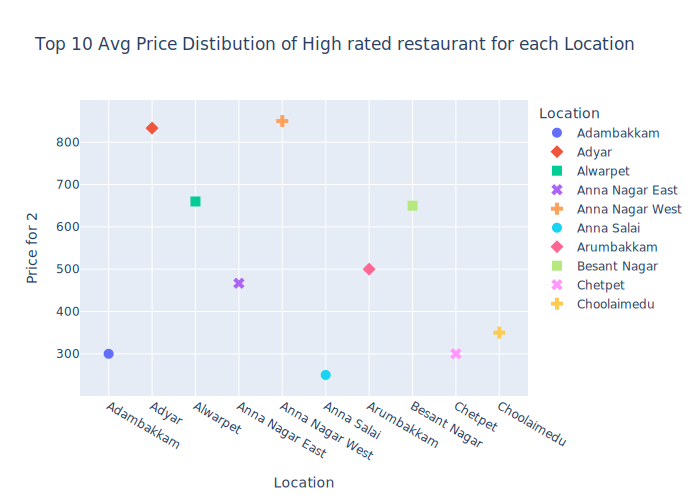

In [52]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Location", symbol="Location",
title='Top 10 Avg Price Distibution of High rated restaurant for each Location').update_traces(marker_size=10)
fig.show()

In [53]:
chinese_df = zomato_chennai_df[zomato_chennai_df['Cuisine'].str.contains('Chinese')]
chinese_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"
5,Dine N Fun,Medavakkam,"'South Indian', ' North Indian', ' Chinese'","'Chicken Grill', ' Shawarma', ' Naan', ' Chick...",450.0,4.1,567,3.8,24700,"'Home Delivery', 'Indoor Seating'"
8,Savoury Sea Shell,Anna Nagar East,"'Arabian', ' Chinese', ' North Indian', ' Leba...","'Shawarma', ' Chicken Grill', ' Brownie', ' Se...",1400.0,4.2,2564,4.1,21700,"'Home Delivery', 'Indoor Seating', 'Card Upon ..."
9,Sangeetha Veg Restaurant,T. Nagar,"'South Indian', ' North Indian', ' Chinese', '...","'Filtered Coffee', ' Chaat', ' Faluda', ' Masa...",800.0,4.4,1578,4.2,39600,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
...,...,...,...,...,...,...,...,...,...,...
11883,Hotel Rahman,Chengalpattu,"'Biryani', ' Chinese', ' Arabian'",,300.0,0.0,0,3.4,127,"'Home Delivery', 'Indoor Seating'"
11886,Hotel Rahman,Medavakkam,"'Biryani', ' Chinese', ' Arabian'",,300.0,0.0,0,3.9,101,"'Home Delivery', 'Indoor Seating'"
11887,Hotel Rahman,Old Mahabalipuram Road (OMR),"'Biryani', ' Chinese', ' Arabian'",,300.0,0.0,0,3.2,26,"'Home Delivery', 'Indoor Seating'"
11959,The Shangai Story,Madipakkam,'Chinese',,350.0,0.0,0,2.9,17,'Delivery Only'


In [54]:
chinese_rest_df = chinese_df.groupby(by=['Location']).agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns = {'Name of Restaurant' :'COUNT OF RESTAURANTS'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df

,Location,COUNT OF RESTAURANTS,Price for 2
139,Porur,92,445.108696
7,Ambattur,82,395.731707
165,T. Nagar,78,507.051282
195,Velachery,78,533.333333
134,Perambur,76,434.210526
12,Anna Nagar East,75,590.666667
107,Medavakkam,70,506.428571
135,Perungudi,69,476.086957
147,Ramapuram,62,430.645161
186,Thuraipakkam,62,545.967742


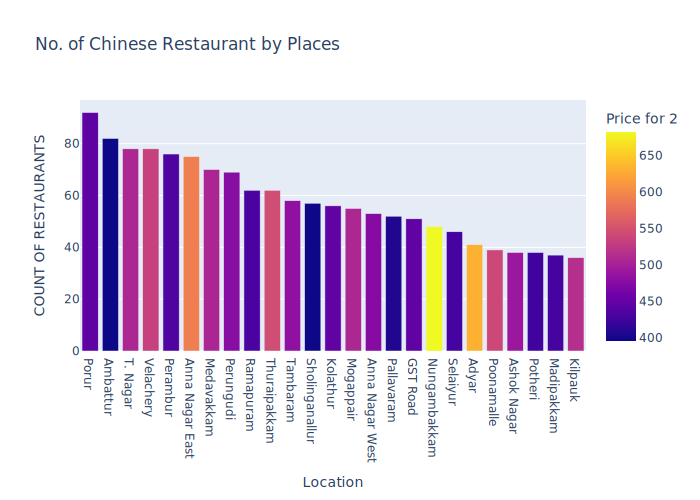

In [55]:
fig = px.bar(chinese_rest_df, x='Location', y='COUNT OF RESTAURANTS', color='Price for 2', title= 'No. of Chinese Restaurant by Places')
fig.show()

In [56]:
#relation between price for 2 and delivery rating for each cuisine type

price_rating_df = veg_df.groupby(['Cuisine','Delivery Rating'])['Price for 2'].mean().reset_index()
price_rating_df

,Cuisine,Delivery Rating,Price for 2
0,'Beverages',4.6,200.0
1,"'Beverages', ' Fast Food', ' Healthy Food', ' ...",4.6,350.0
2,"'Desserts', ' Beverages'",4.2,400.0
3,"'Desserts', ' Beverages'",4.6,300.0
4,'Fast Food',4.4,400.0
5,'Ice Cream',4.6,200.0
6,'Ice Cream',4.7,200.0
7,"'Italian', ' Mexican', ' Salad'",4.2,1500.0
8,"'Mithai', ' North Indian', ' South Indian'",4.6,500.0
9,"'Mithai', ' Street Food', ' Fast Food'",4.4,300.0


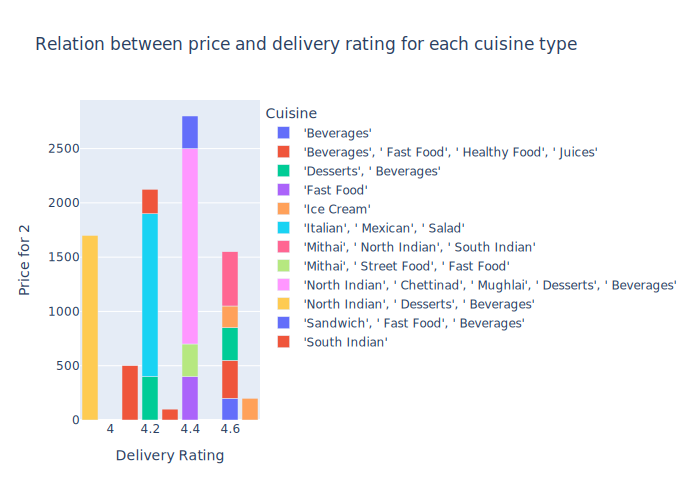

In [57]:
fig = px.bar(price_rating_df, y="Price for 2", x="Delivery Rating",color='Cuisine',title= 'Relation between price and delivery rating for each cuisine type')
fig.show()

In [58]:
# relationship between Location and price
region_price_df = zomato_chennai_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,InterContinental Chennai Mahabalipuram Resort...,1500.000000
1,Abhiramapuram,230.000000
2,"Abu Sarovar Portico, Egmore",1000.000000
3,Adambakkam,306.790123
4,Adyar,476.562500
...,...,...
259,"Vivira Mall, Navallur",500.000000
260,Washermenpet,340.909091
261,"WelcomHotel, RK Salai (Cathedral Road)",2075.000000
262,West Mambalam,273.673469


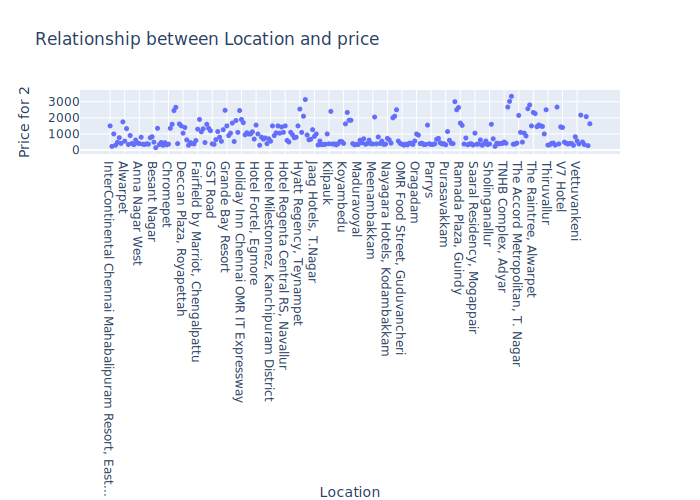

In [59]:
fig = px.scatter(region_price_df, y="Price for 2", x="Location",title= 'Relationship between Location and price').update_traces(marker_size=5)
fig.show()

In [60]:
#affordable restraurants
max_price = zomato_chennai_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

np.float64(1250.0)

In [61]:
#list of restaurants less than 1/4 th of the max price
aff_rest_df = zomato_chennai_df[zomato_chennai_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\3937159516.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
4685,Soda Hub,"OMR Food Street, Navallur",'Beverages',,40.0,3.2,8,0.0,0,"'Takeaway Only', 'Vegetarian Only', 'Desserts ..."
1448,Mamee Soup,West Mambalam,'Healthy Food',"'Herbal Soup', ' French Onion Soup'",60.0,4.1,115,0.0,0,"'Vegetarian Only', 'Indoor Seating'"
2746,G Surya Narayana Snacks Centre,T. Nagar,'Street Food',,100.0,3.9,29,0.0,0,"'Breakfast', 'Takeaway Only'"
138,Bombay Lassi,Triplicane,'Street Food',"'Lassi', ' Samosa', ' Kachori', ' Jalebi', ' C...",100.0,0.0,0,4.3,7457,"'Home Delivery', 'Vegetarian Only'"
2921,Cheta Butter Milk,Thousand Lights,'Beverages',,100.0,3.5,30,4.4,254,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...
93,Kappa Chakka Kandhari,Nungambakkam,"'Kerala', ' South Indian'","'Tender Coconut Pudding', ' Appam', ' Beef Fry...",1200.0,4.7,979,0.0,0,"'Indoor Seating', 'Table booking recommended'"
289,Kuuraku,Vadapalani,'Japanese',"'Ramen', ' Sushi', ' Tea', ' Yakitori Don', ' ...",1200.0,4.5,358,3.9,42,"'Home Delivery', 'Beer', 'Live Entertainment',..."
3697,Zhouyu,Alwarpet,'Asian',,1200.0,3.8,11,0.0,0,"'Home Delivery', 'Indoor Seating'"
4671,Guinness'd Bar,"BKR Grand Hotel, T. Nagar",'Finger Food',,1200.0,3.7,10,0.0,0,"'Full Bar Available', 'Free Parking', 'Wifi', ..."


In [62]:
#highested rated restaurants
highrate_del_rest_df = zomato_chennai_df[zomato_chennai_df['Delivery Rating'] >= 4.5]
highrate_del_rest_df.sort_values(by='Price for 2', inplace=True)
highrate_del_rest_df

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\588295737.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2151,Cane 4 U,Besant Nagar,'Beverages',"'Sugarcane Juice', ' Fruit Juices'",100.0,3.8,52,4.6,160,"'Home Delivery', 'Indoor Seating'"
11043,Kulfi Treat,T. Nagar,"'Desserts', ' Ice Cream', ' Beverages'",,100.0,3.8,54,4.5,316,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
2598,NIC - Natural Ice Creams,T. Nagar,'Ice Cream',,150.0,0.0,0,4.5,266,"'Home Delivery', 'Desserts and Bakes'"
3875,A AA E EE Soup Shop,Karapakkam,"'Sandwich', ' South Indian'",,150.0,3.5,16,4.5,78,"'Home Delivery', 'Outdoor Seating'"
9544,Bombay Kulfi,Kilpauk,'Ice Cream',,150.0,3.1,16,4.6,391,"'Home Delivery', 'Free Parking', 'Outdoor Seat..."
...,...,...,...,...,...,...,...,...,...,...
4038,CakeBee,Teynampet,"'Desserts', ' Bakery'",,500.0,0.0,0,4.5,108,"'Home Delivery', 'Desserts and Bakes'"
4742,Cococane,"OMR Food Street, Guduvancheri",'South Indian',,600.0,3.8,11,4.6,319,"'Home Delivery', 'Indoor Seating'"
164,La Chocolate,Egmore,"'Bakery', ' Desserts', ' Italian', ' Continent...","'Brownie', ' Red Velvet', ' Photo Cake', ' Cho...",800.0,4.0,256,4.5,1574,"'Home Delivery', 'Vegetarian Only', 'Free Park..."
384,Firdouse,Triplicane,"'North Indian', ' Mughlai', ' Chinese', ' Chet...","'Shawarma', ' Biryani', ' Chicken Grill', ' Bb...",800.0,3.7,528,4.5,5228,"'Home Delivery', 'Wifi', 'Indoor Seating'"


In [63]:
#highested rated restaurants
highratedin_rest_df = zomato_chennai_df[zomato_chennai_df['Dining Rating'] >= 4.5]
highratedin_rest_df.sort_values(by='Price for 2', inplace=True)
highratedin_rest_df

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\963448631.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
108,Rayar's Mess,Mylapore,'South Indian',"'Pongal', ' Vada', ' Filtered Coffee', ' Idli'...",100.0,4.7,904,4.3,1319,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
178,Royal Sandwich Shop,Alwarpet,"'Fast Food', ' Desserts', ' Beverages'","'Brownie', ' Cheese Masala Toast', ' Chocolate...",150.0,4.7,1304,3.9,11200,"'Home Delivery', 'Indoor Seating'"
50,Andhikkadai,Velachery,'South Indian',"'Coffee', ' Sweet Kozhukattai', ' Idli', ' Pon...",200.0,4.6,908,4.2,17300,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
154,Nair Mess,Triplicane,"'South Indian', ' Biryani'","'Fish Fry', ' Omelette', ' Vanjaram Fry', ' Ma...",200.0,4.5,1038,0.0,0,'Indoor Seating'
320,Bombay Kulfi,Adyar,'Ice Cream',"'Kesar Pista Kulfi', ' Malai Kulfi', ' Chocola...",200.0,4.9,534,4.3,1476,"'Home Delivery', 'Free Parking', 'Outdoor Seat..."
...,...,...,...,...,...,...,...,...,...,...
445,Dakshin - Crowne Plaza Chennai Adyar Park,"Crowne Plaza Chennai Adyar Park, Alwarpet","'South Indian', ' Kerala', ' Andhra'","'Banana Dosa', ' Elaneer Payasam', ' Appam', '...",2500.0,4.6,377,0.0,0,"'Wheelchair Accessible', 'Full Bar Available',..."
395,Southern Spice - Taj Coromandel,"Taj Coromandel, Nungambakkam",'South Indian',"'Appam', ' Thali', ' Paratha', ' Chicken Curry...",3000.0,4.7,432,0.0,0,"'Wheelchair Accessible', 'Full Bar Available',..."
229,Vasco's - Hilton Chennai,"Hilton Chennai, Guindy","'North Indian', ' Continental', ' Asian'","'Pizza', ' Sushi', ' Salad', ' Pasta', ' Momos...",3400.0,4.6,549,0.0,0,"'Breakfast', 'Wheelchair Accessible', 'Full Ba..."
443,Avartana - ITC Grand Chola,"ITC Grand Chola, Guindy","'South Indian', ' Chinese', ' Desserts'","'Chole', ' Carrot Ice Cream', ' Dumplings', ' ...",4500.0,4.8,371,0.0,0,"'Full Bar Available', 'Table reservation requi..."


In [64]:
#merge both the results
highratedel_aff_df = pd.merge(aff_rest_df, highrate_del_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
highratedel_aff_df = highratedel_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location']]
highratedel_aff_df.rename(columns={'Name of Restaurant':'NAME', 'Price for 2_x':'PRICE', 'Cuisine_x':'CUSINE',
'Location':'Location'},inplace=True)
highratedel_aff_df

,NAME,PRICE,CUSINE,Location
0,Kulfi Treat,100.0,"'Desserts', ' Ice Cream', ' Beverages'",T. Nagar
1,Cane 4 U,100.0,'Beverages',Besant Nagar
2,NIC - Natural Ice Creams,150.0,'Ice Cream',T. Nagar
3,A AA E EE Soup Shop,150.0,"'Sandwich', ' South Indian'",Karapakkam
4,NIC - Natural Ice Creams,150.0,'Ice Cream',Mylapore
...,...,...,...,...
89,The Baker Ninja,500.0,"'Bakery', ' Coffee'",Alwarpet
90,Cococane,600.0,'South Indian',"OMR Food Street, Guduvancheri"
91,Firdouse,800.0,"'North Indian', ' Mughlai', ' Chinese', ' Chet...",Triplicane
92,La Chocolate,800.0,"'Bakery', ' Desserts', ' Italian', ' Continent...",Egmore


In [65]:
#merge both the results
highratedin_aff_df = pd.merge(aff_rest_df, highratedin_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
highratedin_aff_df = highratedin_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location']]
highratedin_aff_df.rename(columns={'Name of Restaurant':'NAME', 'Price for 2_x':'PRICE', 'Cuisine_x':'CUSINE',
'Location':'Location'},inplace=True)
highratedin_aff_df

,NAME,PRICE,CUSINE,Location
0,Rayar's Mess,100.0,'South Indian',Mylapore
1,Royal Sandwich Shop,150.0,"'Fast Food', ' Desserts', ' Beverages'",Alwarpet
2,Royal Sandwich Shop,150.0,"'Fast Food', ' Desserts', ' Beverages'",Alwarpet
3,Royal Sandwich Shop,150.0,"'Fast Food', ' Desserts', ' Beverages'",Alwarpet
4,Nair Mess,200.0,"'South Indian', ' Biryani'",Triplicane
5,Bombay Kulfi,200.0,'Ice Cream',Anna Nagar East
6,Bombay Kulfi,200.0,'Ice Cream',Adyar
7,Andhikkadai,200.0,'South Indian',Velachery
8,Eating Circles,250.0,'South Indian',Alwarpet
9,The Sandwich Shop,300.0,"'Sandwich', ' Fast Food', ' Beverages'",West Mambalam


In [66]:
#most reliable restaurants
meandel_votes = zomato_chennai_df['Delivery Rating Count'].mean()
meandel_votes

np.float64(1012.133828557953)

In [67]:
mean_rest_df = zomato_chennai_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Delivery Rating Count']]
mean_rest_df.rename(columns={'Name of Restaurant':'NAME', 'Price for 2':'PRICE', 'Cuisine':'CUSINE','Location':'Location'},inplace=True)
mean_rest_df = mean_rest_df[mean_rest_df['Delivery Rating Count'] > 1012]
mean_rest_df.sort_values(by='Delivery Rating Count', inplace=True)
mean_rest_df

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\3775081858.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE,Location,Delivery Rating Count
9775,That Waffle Place !,300.0,"'Desserts', ' Beverages'",Royapettah,1014
2514,Devar Hotel,300.0,"'North Indian', ' Chinese'",Tambaram,1015
191,Writer's Cafe,600.0,"'Cafe', ' American'",Gopalapuram,1017
10780,The Good Bowl,500.0,"'North Indian', ' Biryani', ' Italian'",Selaiyur,1017
1380,Sweet Truth,300.0,'Bakery',Porur,1017
...,...,...,...,...,...
8822,Sangeetha Veg Restaurant,500.0,"'South Indian', ' North Indian', ' Chinese'",Thuraipakkam,45500
232,Sapthagiri Tiffin Centre,150.0,"'South Indian', ' Chinese'",T. Nagar,47200
22,Supriya Andhra Restaurant,650.0,"'Biryani', ' North Indian', ' Chinese'",Thuraipakkam,50100
251,Hotelkaar Biriyani,350.0,"'South Indian', ' Biryani'",T. Nagar,51700


In [68]:
reliable_rest_df = pd.merge(mean_rest_df, highratedel_aff_df, how='inner', on=['NAME', 'Location'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_x', 'Location']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_x':'CUSINE','Location':'Location'},inplace=True)
reliable_rest_df

,NAME,PRICE,CUSINE,Location
0,That Waffle Place !,300.0,"'Desserts', ' Beverages'",Royapettah
1,Cafe Clock,400.0,'Beverages',Gopalapuram
2,The Belgian Waffle Co.,300.0,"'Desserts', ' Beverages', ' Fast Food'",Vadapalani
3,Bombay Kulfi,200.0,'Ice Cream',Vepery
4,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', ' ...",Besant Nagar
5,La Chocolate,800.0,"'Bakery', ' Desserts', ' Italian', ' Continent...",Egmore
6,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', ' ...",Thousand Lights
7,The Kandyan,450.0,"'North Indian', ' South Indian', ' Sri Lankan'...",Besant Nagar
8,Domino's Pizza,400.0,"'Pizza', ' Fast Food'",Porur
9,Domino's Pizza,400.0,"'Pizza', ' Fast Food'",Porur


In [69]:
#most reliable restaurants
meandel_votes = zomato_chennai_df['Dining Rating Count'].mean()
meandel_votes

np.float64(106.63188303266124)

In [70]:
mean_rest_df = zomato_chennai_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating Count']]
mean_rest_df.rename(columns={'Name of Restaurant':'NAME', 'Price for 2':'PRICE', 'Cuisine':'CUSINE','Location':'Location'},inplace=True)
mean_rest_df = mean_rest_df[mean_rest_df['Dining Rating Count'] > 107]
mean_rest_df.sort_values(by='Dining Rating Count', inplace=True)
mean_rest_df

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_15484\327978722.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE,Location,Dining Rating Count
1318,Divine Restaurant,950.0,"'North Indian', ' Chinese', ' Chettinad'",Anna Nagar East,108
10203,Lassi House,250.0,'Beverages',Velachery,108
1402,Raintree -Taj Connemara,2800.0,"'Chettinad', ' South Indian'",Anna Salai,108
1388,Madras Hotel,400.0,"'Biryani', ' North Indian', ' Chinese', ' Hyde...",Ramapuram,108
1405,Sukha Nivas,400.0,"'South Indian', ' North Indian', ' Chinese'",Mylapore,108
...,...,...,...,...,...
9026,Copper Kitchen,1000.0,"'North Indian', ' Chinese', ' Chettinad', ' Se...",Porur,5073
9030,Paradise Biryani,800.0,"'Biryani', ' North Indian', ' Chinese'",Perungudi,5317
74,Onesta,600.0,"'Pizza', ' Italian', ' Fast Food', ' Beverages...",Semmancheri,5407
9233,Barbeque Nation,1600.0,"'North Indian', ' Continental', ' Kebab', ' BBQ'",T. Nagar,5821


In [71]:
reliable_rest_df = pd.merge(mean_rest_df, highratedin_aff_df, how='inner', on=['NAME', 'Location'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_x', 'Location']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_x':'CUSINE','Location':'Location'},inplace=True)
reliable_rest_df

,NAME,PRICE,CUSINE,Location
0,Shmoozie's Hand-Crafted Ice Creams,400.0,"'Ice Cream', ' Desserts'",Egmore
1,Kuuraku,1200.0,'Japanese',Vadapalani
2,Bombay Kulfi,200.0,'Ice Cream',Anna Nagar East
3,New Pattukottai Kamatchi Mess,550.0,"'Tamil', ' Chettinad'",T. Nagar
4,Wok Monk,1200.0,"'Asian', ' Chinese', ' Middle Eastern'",Anna Nagar West
5,Blind Ch3mistry,700.0,"'Cafe', ' Continental', ' Italian', ' Desserts...",Teynampet
6,Writer's Cafe,600.0,"'Cafe', ' American'",Taramani
7,Bombay Kulfi,200.0,'Ice Cream',Adyar
8,The Sandwich Shop,300.0,"'Sandwich', ' Fast Food', ' Beverages'",West Mambalam
9,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', ' ...",Thousand Lights
